<a href="https://colab.research.google.com/github/Funatlearn/langgraph101/blob/main/3_sequential_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Third agent, to demonstrates multiple nodes
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 9.5 MB/s eta 0:00:00


In [2]:

from typing import TypedDict, List # use list, typeddict for state
from langgraph.graph import StateGraph # graph
import math

In [3]:
# This is State, shared data structure that keeps track of information as application runs.
class State(TypedDict):
  name: str
  age: str
  final: str

def first_node(state: State) -> State:
  """ This is first node of our sequence"""

  state['final'] = f"Hello there {state['name']}!"

  return state

def second_node(state: State) -> State:
  """ This is second node of our sequence"""

  state['final'] = state['final']+ f"You are {state['age']} old!"

  return state

In [6]:
graph = StateGraph(State)

graph.add_node("first", first_node)
graph.add_node("second", second_node)

graph.add_edge("first", "second")

graph.set_entry_point("first")
graph.set_finish_point("second")

app = graph.compile()

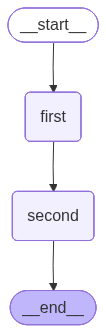

In [7]:
# display graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
# Invoke graph
result = app.invoke({"name": "Bob", "age": "30", "operation": "+"})
print(result['final'])


Hello there Bob!You are 30 old!
